

## 项目 : 预测波士顿房价


欢迎来到 DSVC 《机器学习》研讨班第二周的项目！在此文件中，有些示例代码已经提供给你，但你还需要实现更多的功能来让项目成功运行。除非有明确要求，你无须修改任何已给出的代码。以**编程练习**开始的标题表示接下来的内容中有需要你必须实现的功能。每一部分都会有详细的指导，需要实现的部分也会在注释中以**TODO**标出。请仔细阅读所有的提示！

除了实现代码外，你还**必须**回答一些与项目和实现有关的问题。每一个需要你回答的问题都会以**'问题 X'**为标题。请仔细阅读每个问题，并且在问题后的**'回答'**文字框中写出完整的答案。你的项目将会根据你对问题的回答和撰写代码所实现的功能来进行评分。

>**提示：**Code 和 Markdown 区域可通过 **Shift + Enter** 快捷键运行。此外，Markdown可以通过双击进入编辑模式。

---
## 第一步. 导入数据
在这个项目中，你将利用马萨诸塞州波士顿郊区的房屋信息数据训练和测试一个模型，并对模型的性能和预测能力进行测试。通过该数据训练后的好的模型可以被用来对房屋做特定预测---尤其是对房屋的价值。对于房地产经纪等人的日常工作来说，这样的预测模型被证明非常有价值。

此项目的数据集来自[UCI机器学习知识库(数据集已下线)](https://archive.ics.uci.edu/ml/datasets.html)。波士顿房屋这些数据于1978年开始统计，共506个数据点，涵盖了麻省波士顿不同郊区房屋14种特征的信息。本项目对原始数据集做了以下处理：
- 有16个`'MEDV'` 值为50.0的数据点被移除。 这很可能是由于这些数据点包含**遗失**或**看不到的值**。
- 有1个数据点的 `'RM'` 值为8.78. 这是一个异常值，已经被移除。
- 对于本项目，房屋的`'RM'`， `'LSTAT'`，`'PTRATIO'`以及`'MEDV'`特征是必要的，其余不相关特征已经被移除。
- `'MEDV'`特征的值已经过必要的数学转换，可以反映35年来市场的通货膨胀效应。

运行下面区域的代码以载入波士顿房屋数据集，以及一些此项目所需的Python库。如果成功返回数据集的大小，表示数据集已载入成功。

In [42]:
# 载入此项目所需要的库
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 检查你的Python版本
from sys import version_info
if version_info.major != 2 and version_info.minor != 7:
    raise Exception('请使用Python 2.7来完成此项目')
    
# 让可视化的结果在notebook中显示
%matplotlib inline

In [43]:
# 载入波士顿房屋的数据集
data = pd.read_csv('housing.csv')
prices = data['MEDV']
features = data.drop('MEDV', axis = 1)
    
# 完成
print ("Boston housing dataset has {} data points with {} variables each.".format(*data.shape))

Boston housing dataset has 489 data points with 4 variables each.


__下面三张图的横坐标分别是：住宅平均房间数量、区域中被认为是低收入阶层的比率和镇上学生与教师数量比例，纵坐标是房屋的中值价格__

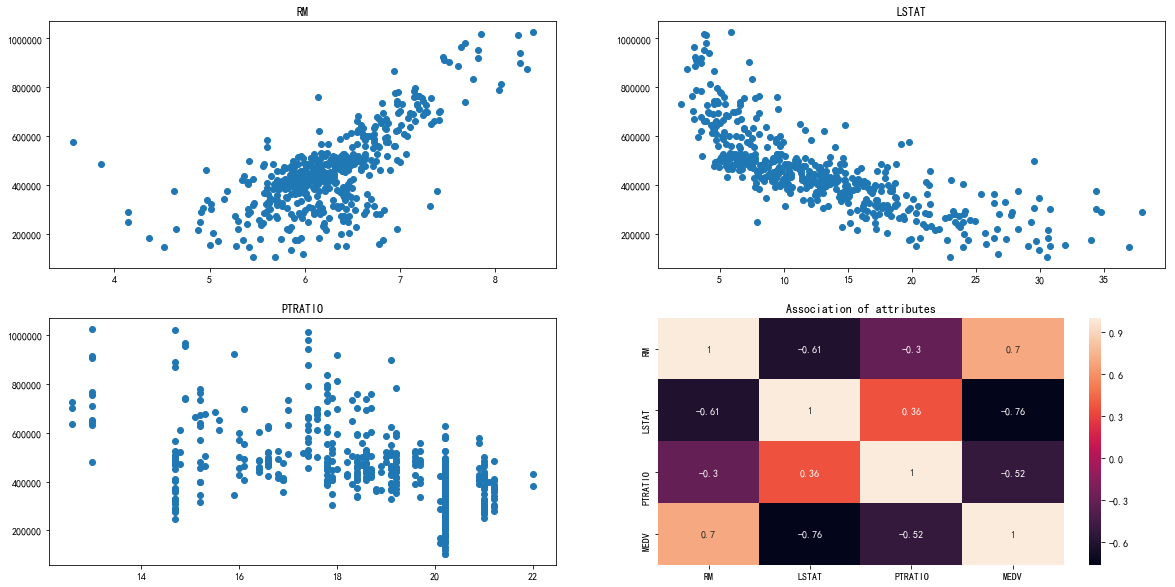

In [44]:
import seaborn as sns
plt.figure(figsize=(20, 10))
plt.subplot(2, 2, 1)
plt.title('RM')
plt.scatter(features.get_values()[:, 0], prices.get_values())
plt.subplot(2, 2, 2)
plt.title('LSTAT')
plt.scatter(features.get_values()[:, 1], prices.get_values())
plt.subplot(2, 2, 3)
plt.title('PTRATIO')
plt.scatter(features.get_values()[:, 2], prices.get_values())

plt.subplot(2, 2, 4)
plt.title('Association of attributes')
sns.heatmap(data.corr(), annot=True)

---
## 第二步. 分析数据
在项目的第一个部分，你会对波士顿房地产数据进行初步的观察并给出你的分析。通过对数据的探索来熟悉数据可以让你更好地理解和解释你的结果。

由于这个项目的最终目标是建立一个预测房屋价值的模型，我们需要将数据集分为**特征(features)**和**目标变量(target variable)**。
- **特征** `'RM'`， `'LSTAT'`，和 `'PTRATIO'`，给我们提供了每个数据点的数量相关的信息。
- **目标变量**：` 'MEDV'`，是我们希望预测的变量。

他们分别被存在`features`和`prices`两个变量名中。

### 编程练习 1：基础统计运算
你的第一个编程练习是计算有关波士顿房价的描述统计数据。我们已为你导入了` numpy `，你需要使用这个库来执行必要的计算。这些统计数据对于分析模型的预测结果非常重要的。
在下面的代码中，你要做的是：
- 计算`prices`中的`'MEDV'`的最小值、最大值、均值、中值和标准差；
- 将运算结果储存在相应的变量中。

In [45]:
#TODO 1

#目标：计算价值的最小值
minimum_price = np.min(prices)

#目标：计算价值的最大值
maximum_price = np.max(prices)

#目标：计算价值的平均值
mean_price = np.mean(prices)

#目标：计算价值的中值
median_price = np.median(prices)

#目标：计算价值的标准差
std_price = np.std(prices)

mean_RM = np.mean(data['RM'])
mean_LSTAT= np.mean(data['LSTAT'])
mean_PTRATIO = np.mean(data['PTRATIO'])

#目标：输出计算的结果
print ("Statistics for Boston housing dataset:\n")
print ("Minimum price: ${:,.2f}".format(minimum_price))
print ("Maximum price: ${:,.2f}".format(maximum_price))
print ("Mean price: ${:,.2f}".format(mean_price))
print ("Median price ${:,.2f}".format(median_price))
print ("Standard deviation of prices: ${:,.2f}".format(std_price))
print ("Mean RM: ${:,.2f}".format(mean_RM))
print ("Mean LSTAT: ${:,.2f}".format(mean_LSTAT))
print ("Mean PTRATIO: ${:,.2f}".format(mean_PTRATIO))

Statistics for Boston housing dataset:

Minimum price: $105,000.00
Maximum price: $1,024,800.00
Mean price: $454,342.94
Median price $438,900.00
Standard deviation of prices: $165,171.13
Mean RM: $6.24
Mean LSTAT: $12.94
Mean PTRATIO: $18.52


### 问题 1 - 特征观察

如前文所述，本项目中我们关注的是其中三个值:`'RM'`、`'LSTAT'` 和`'PTRATIO'`，对每一个数据点:
- `'RM'` 是该地区中每个房屋的平均房间数量；
- `'LSTAT'` 是指该地区有多少百分比的房东属于是低收入阶层（有工作但收入微薄）；
- `'PTRATIO'` 是该地区的中学和小学里，学生和老师的数目比（`学生/老师`）。

_凭直觉，上述三个特征中对每一个来说，你认为增大该特征的数值，`'MEDV'`的值会是**增大**还是**减小**呢？每一个答案都需要你给出理由。_

**提示：**你预期一个`'RM'` 值是6的房屋跟`'RM'` 值是7的房屋相比，价值更高还是更低呢？

### 问题 1 - 回答：
#### 一般来说，如果一个房屋里的房间数量越多，那么这间房屋的面积越大，相应的房屋的价格就会越昂贵，因此随着'RM'特征数值的增大，'MEDV'的值会随之增大，两者成正比关系；
#### 随着'LSTAT'的值增大，则说明该地区房东属于低收入阶层的百分比越高，一个地区低收入的人数越多，则该地区的经济水平越低，相应的房价也就越低，所以随着'LSTAT'的值的增大，'MEDV'的值会随之减小，两者成反比；
#### 随着'PTRATIO'的值的增大，则该地区学生和老师的数目比越大，即该地区的学生远远多于老师，说明该地区的教育水平较低，教育水平较低的地方一般来说房价也较低，所以随着'PTRATIO'的值的增大，'MEDV'的值会减小，两者成反比。

### 编程练习 2: 数据分割与重排
接下来，你需要把波士顿房屋数据集分成训练和测试两个子集。通常在这个过程中，数据也会被重排列，以消除数据集中由于顺序而产生的偏差。
在下面的代码中，你需要

将`features`和`prices`的数据都分成用于训练的数据子集和用于测试的数据子集。
  - 分割比例为：80%的数据用于训练，20%用于测试；
  - 选定一个数值以设定 `random_seed` ，这会确保结果的一致性；
  - 提示：打乱训练集和测试集的数据时，只要创建一个 list，然后用这个 list 分别应用于 X，y 生成训练集和测试集。
 ```
 test = np.array([1, 3, 5, 7, 9, 11])
 """ test[[0,1,2]] = [1, 3, 5]
 """ test[[1,3,5]] = [3, 7, 11]
 ```
  
  可能需要用到的函数
  - (numpy.random.seed)[https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.seed.html]
  - (numpy.random.shuffle)[https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.shuffle.html]

In [46]:
#将数据集分为训练集和测试集
LEN, seed = 489,711
def generate_train_and_test(X, y):
    """打乱并分割数据为训练集和测试集"""
    if seed:
        np.random.seed(seed)
    data_list=[i for i in range(LEN)]
    
    np.random.shuffle(data_list)
    
    train_size=int(round(LEN*0.8,0))
    
    train_indexs=data_list[:train_size]
    
    test_indexs=data_list[train_size:]
    
    return X[train_indexs], X[test_indexs],y[train_indexs],y[test_indexs]

X_train, X_test, y_train, y_test = generate_train_and_test(features.values, prices.values)
print(X_train)
print(features.values)

[[ 6.998  2.94  18.7  ]
 [ 6.279 11.97  18.7  ]
 [ 6.066  6.43  14.7  ]
 ...
 [ 6.208 15.17  20.2  ]
 [ 5.888 14.8   21.1  ]
 [ 7.454  3.11  15.9  ]]
[[ 6.575  4.98  15.3  ]
 [ 6.421  9.14  17.8  ]
 [ 7.185  4.03  17.8  ]
 ...
 [ 6.976  5.64  21.   ]
 [ 6.794  6.48  21.   ]
 [ 6.03   7.88  21.   ]]


### 问题 2 - 训练及测试
*将数据集按一定比例分为训练用的数据集和测试用的数据集对学习算法有什么好处？*

*如果果用模型已经见过的数据，例如部分训练集数据进行测试，又有什么坏处？*

**提示：** 如果没有数据来对模型进行测试，会出现什么问题？

### 问题 2 - 回答:
#### 将数据分成两部分有利于在作出模型后对模型进行验证，评估模型对于数据的匹配程度，比如是否存在欠拟合和过拟合问题等。如果没有测试集，那么就无法对模型的好坏做出准确的评估。
#### 模型是由训练集得出的，那么如果用部分训练集数据来测试模型，显然是会得到比较好的结果，不能反映模型的好坏。

---
## 第三步. 模型衡量标准

### 编程练习3：定义衡量标准
如果不能对模型的训练和测试的表现进行量化地评估，我们就很难衡量模型的好坏。通常我们会定义一些衡量标准，这些标准可以通过对某些误差或者拟合程度的计算来得到。在这个项目中，你将通过运算[*决定系数*](http://stattrek.com/statistics/dictionary.aspx?definition=coefficient_of_determination) R<sup>2</sup> 来量化模型的表现。模型的决定系数是回归分析中十分常用的统计信息，经常被当作衡量模型预测能力好坏的标准。

R<sup>2</sup>的数值范围从0至1，表示**目标变量**的预测值和实际值之间的相关程度平方的百分比。一个模型的R<sup>2</sup> 值为0还不如直接用**平均值**来预测效果好；而一个R<sup>2</sup> 值为1的模型则可以对目标变量进行完美的预测。从0至1之间的数值，则表示该模型中目标变量中有百分之多少能够用**特征**来解释。_模型也可能出现负值的R<sup>2</sup>，这种情况下模型所做预测有时会比直接计算目标变量的平均值差很多。_

在下方代码的 `performance_metric` 函数中，你要实现：
- 计算 `y_true` 和 `y_predict`的R<sup>2</sup>值，作为对其表现的评判，可参考[`r2_score`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html)。
- 将他们的表现评分储存到`score`变量中。


In [47]:
# TODO 3

def performance_metric(y_true, y_predict):
    """计算并返回预测值相比于预测值的分数"""
    y_mean = float(sum(y_true))/len(y_true)
    
    sst = sum([(each-y_mean)**2 for each in y_true])
    sse = sum([(t-p)**2 for t,p in zip(y_true, y_predict)])
    
    score = 1 - float(sse)/sst    
    
    return score

### 问题 3 - 拟合程度

假设一个数据集有五个数据且一个模型做出下列目标变量的预测：

| 真实数值 | 预测数值 |
| :-------------: | :--------: |
| 3.0 | 2.5 |
| -0.5 | 0.0 |
| 2.0 | 2.1 |
| 7.0 | 7.8 |
| 4.2 | 5.3 |
*你觉得这个模型已成功地描述了目标变量的变化吗？如果成功，请解释为什么，如果没有，也请给出原因。*  

**提示**：运行下方的代码，使用`performance_metric`函数来计算模型的决定系数。

In [48]:
# 计算这个模型的预测结果的决定系数
score = performance_metric([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
print ("Model has a coefficient of determination, R^2, of {:.3f}.".format(score))

Model has a coefficient of determination, R^2, of 0.923.


### 问题 3 - 回答:
#### 我认为该模型已经比较成功地描述了目标变量的变化，因为R^2为0.923接近于1，表示因变量Y的92.3%的变化由我们的自变量X来解释，说明模型对目标变量几乎可以进行完美的预测。

## 第四步. 模型训练
### 编程练习 4：训练回归模型
在这个练习中，你将需要将所学到的内容整合，使用 **gradient descent 算法**训练一个线性回归模型。你可以尝试使用自己构建的多项式特征和 L1、L2 Loss，进行实验后，讨论他们是否对你的模型有效，并通过前面定义的 `performance_metric` 量化他们的提升效果。

在这里，你不能使用现成 package，不能使用额外 data。


In [49]:
# TODO 4
import matplotlib.pyplot as plt

#数据归一化
def normalFeature(X):
    resX = np.empty(shape=X.shape, dtype=float)
    mean_X = np.mean(X, axis = 0)
    normal = np.std(X, axis = 0)
    for i in range(X.shape[1]):
        resX[:, i] = (X[:,i] - mean_X[i])/normal[i]
    return resX

#计算目标函数
def computeJ(X,y,theta):
    m = len(y)
    temp = (np.sum((X.dot(theta) - y)**2))/(2*m)
    return temp

#求导
def derivJ(X, y, theta):
    deriv = np.empty(len(theta)) 
    deriv[0] = np.sum(X.dot(theta) - y) #b
    for i in range(1, len(theta)):
        deriv[i] = (X.dot(theta) - y).dot(X[:, i]) #除第一列的其他特征
    return deriv / len(X)

#　梯度下降实现
def gradientDescent(X, y, theta, n_iters=1000, alpha=0.005):   
    for i in range(n_iters):
        deriv = derivJ(X, y, theta)
        theta = theta - alpha * deriv 
        if(i % 100 == 0):
            print(computeJ(X,y,theta))
    
    return theta

def train(X, y):
    X_train_add1 = np.hstack([np.ones((len(X), 1)), X])
    init_theta = np.zeros(X_train_add1.shape[1]) #初始化theta向量，长度对应样本中的特征数＋１
    theta = gradientDescent(X_train_add1, y, init_theta)#在原来的样本矩阵前加一列特征，特征值都为１,即X1
    return theta

def predict(X_test, theta):
    X_test_add1 = np.hstack([np.ones((len(X_test), 1)), X_test])
    return X_test_add1.dot(theta)


#　测试模型
# print("标准化：")
X_train = normalFeature(X_train)
theta = train(X_train, y_train)
print(theta)
X_test = normalFeature(X_test)
y_predict = predict(X_test, theta)
print(y_predict.shape)
score = performance_metric(y_test, y_predict)
print(score)

115382077128.54976
43120794721.015465
18192903138.508236
9292003617.631226
6062147775.65093
4881022627.435325
4447139880.914804
4287103329.4027796
4227740892.047888
4205513468.039446
[451067.25454984  53080.43060877 -76558.8059374  -40158.96451183]
(98,)
0.8361207961373933


### 问题 4 - 回归模型的优化
在最基础的回归模型上，你使用了什么办法来提升模型的效果，最后模型的性能是否得到了提升？如果提升了，请说出提升性能的原理，如果没有，请探究没有生效的原因。

### 问题 4 - 回答：
#### 对特征进行标准化处理，模型的性能有显著的提高
#### 线性变换其协方差产生倍数值的缩放，无法消除量纲对方差、协方差的影响，由于量纲的存在，使用不同的量纲、距离的计算结果会不同，在精度上当然会有影响。使用0均值对方差进行了归一化，这时候每个维度的量纲其实已经等价了。并且标准化处理会加快梯度下降求最优解的速度。

## 第五步. 做出预测
当我们用数据训练出一个模型，它现在就可用于对新的数据进行预测。在决策树回归函数中，模型已经学会对新输入的数据*提问*，并返回对**目标变量**的预测值。你可以用这个预测来获取数据未知目标变量的信息，这些数据必须是不包含在训练数据之内的。

### 问题 5 - 预测销售价格
想像你是一个在波士顿地区的房屋经纪人，并期待使用此模型以帮助你的客户评估他们想出售的房屋。你已经从你的三个客户收集到以下的资讯:

| 特征 | 客戶 1 | 客戶 2 | 客戶 3 |
| :---: | :---: | :---: | :---: |
| 房屋内房间总数 | 5 间房间 | 4 间房间 | 8 间房间 |
| 社区贫困指数（％被认为是贫困阶层） | 17% | 32% | 3% |
| 邻近学校的学生-老师比例 | 15：1 | 22：1 | 12：1 |

*你会建议每位客户的房屋销售的价格为多少？从房屋特征的数值判断，这样的价格合理吗？为什么？* 

**提示：**用你在**分析数据**部分计算出来的统计信息来帮助你证明你的答案。

运行下列的代码区域，使用你的模型来为每位客户的房屋价值做出预测。

In [50]:
# 生成三个客户的数据
client_data = [[5, 17, 15], # 客户 1
               [4, 32, 22], # 客户 2
               [8, 3, 12]]  # 客户 3

# 进行预测
print(theta)
client_data = normalFeature(np.array(client_data))
predicted_price = predict(client_data, theta)
for i, price in enumerate(predicted_price):
    print ("Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price))

[451067.25454984  53080.43060877 -76558.8059374  -40158.96451183]
Predicted selling price for Client 1's home: $445,181.99
Predicted selling price for Client 2's home: $249,880.75
Predicted selling price for Client 3's home: $658,139.02


In [51]:
print ("Statistics for Boston housing dataset:\n")
print ("Minimum price: ${:,.2f}".format(minimum_price))
print ("Maximum price: ${:,.2f}".format(maximum_price))
print ("Mean price: ${:,.2f}".format(mean_price))
print ("Median price ${:,.2f}".format(median_price))
print ("Standard deviation of prices: ${:,.2f}".format(std_price))
print ("Mean RM: ${:,.2f}".format(mean_RM))
print ("Mean LSTAT: ${:,.2f}".format(mean_LSTAT))
print ("Mean PTRATIO: ${:,.2f}".format(mean_PTRATIO))

Statistics for Boston housing dataset:

Minimum price: $105,000.00
Maximum price: $1,024,800.00
Mean price: $454,342.94
Median price $438,900.00
Standard deviation of prices: $165,171.13
Mean RM: $6.24
Mean LSTAT: $12.94
Mean PTRATIO: $18.52


### 问题 5 - 回答：
#### 建议客户的房屋售价如结果所示
价格均合理。
波斯顿数据集中平均房间数6间，社区中将近13%贫困阶层，临近学校学生与老师之比为19:1。
首先三位客户的预测售价都在最大值和最小值之间。
其次第一位客户房间数量为5间，社区中17%为贫困阶层，临近学校学生与老师之比为15:1，与波斯顿平均水平相差不大，预测的房屋售价也应该与波斯顿平均水平454342美元相差不大；第三位客户房间数量为8间，社区中3%为贫困阶层，临近学校学生与老师之比为12:1，条件明显优于波斯顿平均水平，也明显优于第一位客户标准，所以第二位客户的房屋售价也应高于波斯顿平均水平454342美元。第二位客户房间数量为4间，社区中32%为贫困阶层，临近学校学生与老师之比为22:1，生活的区域较为贫穷，应比第一位客户房屋售价还要低。

### 编程练习 5
你刚刚预测了三个客户的房子的售价。在这个练习中，你将用你的最优模型在整个测试数据上进行预测, 并计算相对于目标变量的决定系数 R<sup>2</sup>的值**。

In [52]:
#TODO 5

# 提示：你可能需要用到 X_test, y_test, performance_metric
# 提示：你需要使用编程练习 4 中得到参数数值进行预测
# 提示：你可能需要参考问题3的代码来计算R^2的值

r2 = 1
y_predict = predict(X_test, theta)
r2 = performance_metric(y_test, y_predict)

print ("Optimal model has R^2 score {:,.2f} on test data".format(r2))

Optimal model has R^2 score 0.84 on test data


## 第六步. 分析结果

### 问题6 - 分析决定系数

你刚刚计算了最优模型在测试集上的决定系数，你会如何评价这个结果？（你也可以尝试使用你的模型对问题 5 中三个客户的房屋价值进行预测，并与你之前的预测值进行对比）

### 问题6 - 回答
#### 在测试集上的决定系数R^2为0.84，表示因变量Y的84%的变化由我们的自变量X来解释，比直接用平均值预测效果要好很多，说明模型基本符合条件，但还需要进一步优化。

## 第七步. 可视化预测效果


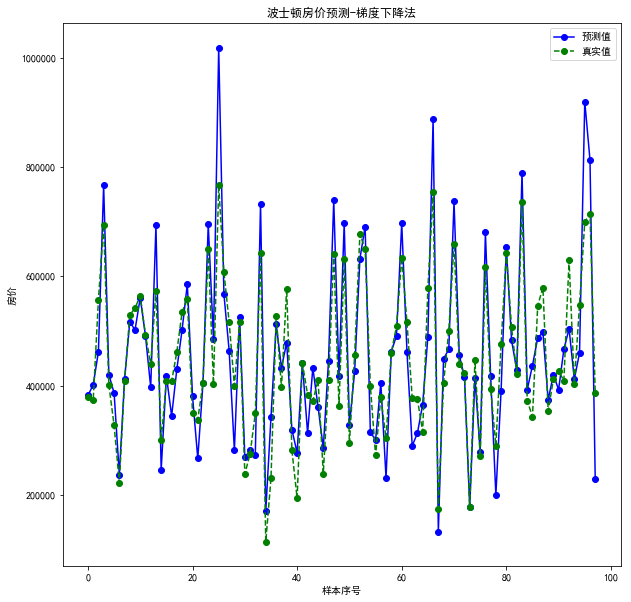

In [53]:
import matplotlib as mpl
import matplotlib.pyplot as plt #设置matplotlib 支持中文显示
mpl.rcParams['font.sans-serif'] = 'SimHei'  #设置字体为黑体
mpl.rcParams['axes.unicode_minus'] = False #设置在中文字体是能够正常显示负号（“-”） 
plt.figure(figsize=(10,10))#绘制预测值
plt.plot(y_test,'bo-',label="预测值")
plt.plot(y_predict,'go--',label="真实值")
plt.title("波士顿房价预测-梯度下降法")
plt.xlabel("样本序号")
plt.ylabel("房价")
plt.legend()
plt.show()

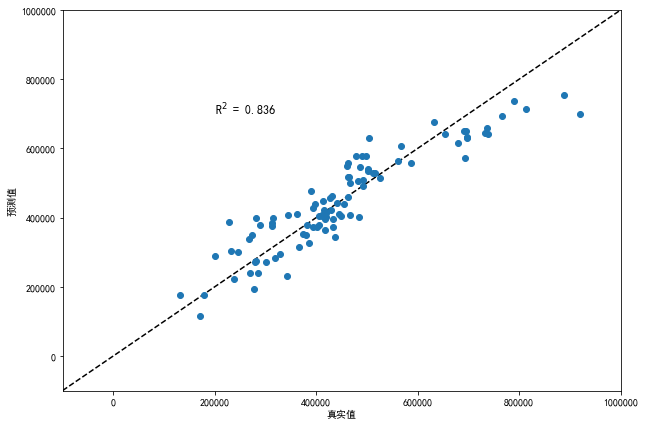

In [54]:
plt.figure(figsize=(10,7))
plt.plot([-100000, 1000000], [-100000, 1000000], 'k--')
plt.axis([-100000, 1000000, -100000, 1000000])
plt.plot(y_test, y_predict, 'o')
plt.xlabel('真实值')
plt.ylabel('预测值') # 产生一个文本框来显示方差
scorestr = r'R$^2$ = %.3f' % score
plt.text(200000, 700000, scorestr, fontsize=12)
plt.show()
